In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import optimize
import pandas as pd

from scipy import integrate
from scipy import special


In [37]:
# Parameters

#s_tilda=np.linspace(0,10,100)
        #doesn't change much between the choice of 10 or 99


m1 = 0.050                                #GeV DM Mass
delta=0.3*m1
m2=m1+delta

mzprime=3*m1                                  #Mass of the dark photon in GeV    150 MeV
Mp = 1.22e19   
m=0.000501                                 # I choose the electron mass in Gev
mmu=0.1057                                 # mass of the muon in GeV


s0= m1**2 + m2**2 + 2*m1*m2
sample=np.linspace(0.013960832263531195,0.014834245340895941,100)         # How can be its range?     ****up to 100 GeV

     # Modified the energy range accordingly with the Temperature range we are considering (50-1) MeV
         # Computations below
        
    # NEWS: with the range of energies of np.linspace(0.0136849,0.0361623,100) we encounter a resonance
    # a huge one at a value of s=0.023....
    # I think we just have to consider the range of energies around the decoupling...
    # the decoupling occur around x=14 and x=30 which is a range of temperatures of 3.5 MeV and 1.6 MeV
    # recall that x=20 correspond to a T=2.5 MeV
    # Let's try now with: np.linspace(0.013960832263531195,0.014834245340895941,100)
    
s=sample  #+s0                      #the lowest value for s is s0 (assuming velocities zeros)

s_che_va_dentro_sigma=s-s0



epsilon=1E-3               # Has inside some factors as indicated in the computation papers     1E-4
alpha_dark=1E-1               # what values?       (1E-3    -   1E-1)  
alpha_em=1/137



pfin_pinit= (np.sqrt(abs(((s-2*m**2)**2)-4*(m**4))/abs(((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))))   # ratio pfinal over p initial
p_fin=np.sqrt((((s-2*m**2)**2)-4*(m**4))/4*s)        # p final
p_init=np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s))      # p initial had to add the
               #abs was inside the sqrt to keep it positive           #absolute value because the first elemnt gives a sqrt of negative

E1= np.sqrt(m1**2 + p_init**2)
E2= np.sqrt(m2**2 + p_init**2)

$$K_B=8.617333 \times 10^{-5} eV \ K^{-1} \ \ \ \ \ \ E=\frac{1}{2}K_B T$$
So you can express the temperature in function of the energy, actually $T \approx E$
$$T=\frac{2E}{K_B}$$ If the enrgy is on the MeV order $$T=\frac{2 \times 10^6 eV}{8.617333 \times 10^{-5} eV \ K^{-1}} \approx 10^{10}K $$

Now, let's say the thermal bath energy is on the order of the MeV, which is the average kinetic energy:
$$E= \frac{1}{2}\frac{p^2}{m} \rightarrow p=\sqrt{\frac{2 Em}{}}$$
$$p=m \gamma v \rightarrow \gamma v= \sqrt{\frac{2 E}{m}} $$
Squaring everithing
$$\frac{1}{\Big(1- \frac{v^2}{c^2} \Big)} v^2= \Big(\frac{2 E}{m}\Big) \Longrightarrow v^2= [\Big(\frac{2 E}{m}\Big)]- \frac{v^2}{c^2}[\Big(\frac{2 E}{m}\Big)]$$
$$\Longrightarrow v^2 \Big(1+ \frac{1}{c^2}[\Big(\frac{2 E}{m}\Big)] \Big)= [\Big(\frac{2 E}{m}\Big)]$$

$$v= \sqrt \frac{[\Big(\frac{2 E}{m}\Big)]}{1+ \frac{1}{c^2}[\Big(\frac{2 E}{m}\Big)]}$$



### We'll making x1 go from 1 to 50?

### $x_1=m_1/T$ so the range of T are: $0.05/1= 0.05 \ GeV$ and $0.05/50= 0.001 \ GeV$. So T=(50MeV to 1MeV)



### Moreover the decoupling occur at an x approximatively equal to 20, which means

### $T=m1/x= 0.05 GeV/20=0.0025 GeV \approx 2.5 MeV$ 

### Range of energies?
### $s_{min}=(E_{1min}+E_{2min})^2$    to    $s_{max}=(E_{1max}+E_{2max})^2$

In [38]:
#The upper converted into code:
Energy_of_bath=1.6    # MeV
mass_of_kindidate= 50+(50*0.3)  #MeV
velocity_of_DM= np.sqrt((2*Energy_of_bath/mass_of_kindidate)/(1+(2*Energy_of_bath/mass_of_kindidate)))
velocity_of_DM

# DM IS ALWAYS NON RELATIVISTIC WHEN DECOUPLE
# IN THE FOLLOWING COMPUTATION YOU SEE THAT THE KINETIC ENERGY IS NOT HIGH

0.21661214442955293

In [39]:
# With 1 MeV velocity is 0.19611613513818404       for m1=50 MeV
# with 50 MeV velocity is 0.816496580927726       for m1=50 MeV
# With 1 MeV velocity is 0.17277368511627203      for m2=(50*0.3)+50 MeV
# with 50 MeV velocity is 0.778498944161523       for m2=(50*0.3)+50 MeV

# With 1.6 MeV velocity is 0.24525573579398632       for m1=50 MeV
# with 3.5 MeV velocity is 0.3504383220252312       for m1=50 MeV
# With 1.6 MeV velocity is 0.21661214442955293      for m2=(50*0.3)+50 MeV
# with 3.5 MeV velocity is 0.31180478223116176       for m2=(50*0.3)+50 MeV


# MINIMUM ENERGY CASE

velocity1=0.24525573579398632         # MATHEUS LAST TIME SAID THAT AT MAXIMUM I HAVE TO CONSIDER v=0.1c
velocity2=0.21661214442955293

Energy1= np.sqrt((m1**2)+ (m1* (1/np.sqrt(1-velocity1**2))*velocity1)**2)
Energy2= np.sqrt((m2**2)+ (m2* (1/np.sqrt(1-velocity2**2))*velocity2)**2)

print(Energy1)
print(Energy2)
print((Energy1+Energy2)**2)
print(s0)
# BASICALY IS LIKE JUST CONSIDER THE ENERGY AT REST

0.05157518783291051
0.06658077800686922
0.013960832263531195
0.013225


In [40]:
# With 1 MeV velocity is 0.19611613513818404       for m1=50 MeV
# with 50 MeV velocity is 0.816496580927726       for m1=50 MeV
# With 1 MeV velocity is 0.17277368511627203      for m2=(50*0.3)+50 MeV
# with 50 MeV velocity is 0.778498944161523       for m2=(50*0.3)+50 MeV

# MAXIMUM ENERGY CASE

velocity1=0.3504383220252312         # MATHEUS LAST TIME SAID THAT AT MAXIMUM I HAVE TO CONSIDER v=0.1c
velocity2=0.31180478223116176

Energy1= np.sqrt((m1**2)+ (m1* (1/np.sqrt(1-velocity1**2))*velocity1)**2)
Energy2= np.sqrt((m2**2)+ (m2* (1/np.sqrt(1-velocity2**2))*velocity2)**2)

print(Energy1)
print(Energy2)
print((Energy1+Energy2)**2)
print(s0)

0.05338539126015656
0.06841052550594828
0.014834245340895941
0.013225


## So the energy range is from  0.190 GeV (maximum value) to 0.116 GeV (minimum value)

$$E_2 \approx E_1= \sqrt{m_1^2+ p_1^2}=\sqrt{(0.05)^2+ (0.05 \gamma 0.1c)^2}=\sqrt{(0.05)^2+ (0.05 \frac{1}{\sqrt{1-(0.1)^2}} 0.1c)^2}$$

In [41]:
s

array([0.01396083, 0.01396965, 0.01397848, 0.0139873 , 0.01399612,
       0.01400494, 0.01401377, 0.01402259, 0.01403141, 0.01404023,
       0.01404906, 0.01405788, 0.0140667 , 0.01407552, 0.01408435,
       0.01409317, 0.01410199, 0.01411081, 0.01411963, 0.01412846,
       0.01413728, 0.0141461 , 0.01415492, 0.01416375, 0.01417257,
       0.01418139, 0.01419021, 0.01419904, 0.01420786, 0.01421668,
       0.0142255 , 0.01423433, 0.01424315, 0.01425197, 0.01426079,
       0.01426961, 0.01427844, 0.01428726, 0.01429608, 0.0143049 ,
       0.01431373, 0.01432255, 0.01433137, 0.01434019, 0.01434902,
       0.01435784, 0.01436666, 0.01437548, 0.01438431, 0.01439313,
       0.01440195, 0.01441077, 0.01441959, 0.01442842, 0.01443724,
       0.01444606, 0.01445488, 0.01446371, 0.01447253, 0.01448135,
       0.01449017, 0.014499  , 0.01450782, 0.01451664, 0.01452546,
       0.01453429, 0.01454311, 0.01455193, 0.01456075, 0.01456957,
       0.0145784 , 0.01458722, 0.01459604, 0.01460486, 0.01461

In [42]:
def pfin_pinit(s):
    return np.sqrt(abs(((s-2*m**2)**2)-4*(m**4))/abs(((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2)))

def p_fin(s):
    return np.sqrt((((s-2*m**2)**2)-4*(m**4))/4*s)

def p_init(s):
    return np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s))

def E1(s):
    return np.sqrt(m1**2 + p_init(s)**2)

def E2(s):
    return np.sqrt(m2**2 + p_init(s)**2)

In [43]:
s0= m1**2 + m2**2 + 2*m1*m2
s0

0.013225

[0.05       0.04806276 0.04620057 0.04441054 0.04268986 0.04103585
 0.03944592 0.0379176  0.03644849 0.0350363  0.03367882 0.03237394
 0.03111962 0.02991389 0.02875488 0.02764078 0.02656984 0.0255404
 0.02455084 0.02359962 0.02268526 0.02180632 0.02096144 0.02014929
 0.01936861 0.01861818 0.01789682 0.01720341 0.01653687 0.01589615
 0.01528026 0.01468822 0.01411913 0.01357209 0.01304624 0.01254077
 0.01205488 0.01158781 0.01113884 0.01070727 0.01029242 0.00989364
 0.00951031 0.00914184 0.00878764 0.00844716 0.00811988 0.00780528
 0.00750286 0.00721217 0.00693273 0.00666412 0.00640592 0.00615773
 0.00591915 0.00568981 0.00546936 0.00525745 0.00505375 0.00485794
 0.00466972 0.0044888  0.00431488 0.0041477  0.003987   0.00383252
 0.00368403 0.00354129 0.00340409 0.0032722  0.00314542 0.00302355
 0.0029064  0.00279379 0.00268555 0.0025815  0.00248148 0.00238533
 0.00229291 0.00220407 0.00211868 0.00203659 0.00195768 0.00188183
 0.00180892 0.00173884 0.00167146 0.0016067  0.00154445 0.00148

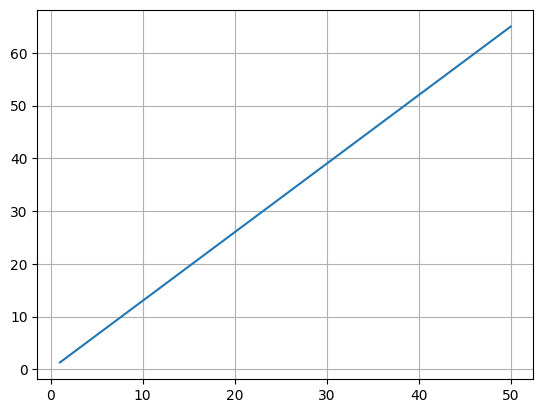

In [44]:
x1=np.logspace(np.log10(1),np.log10(50),100)       #***** CHANGING THIS INTERVAL CHANGE EVERITHING****

# I choose this in order to have a temperature range that goes from 50 MeV to 1 MeV      ****m2!!!**
# Should be this correct?


# x=m/T         x1=np.logspace(np.log10(1),np.log10(100),100)


x2=x1*((m1+delta)/m1)
plt.plot(x1,x2)
plt.grid()

T=m2/x2
print(T)
Tsomething=m1/x1        #Just to prove that they are equal
print(Tsomething)

In [45]:
# I NEED TO FLIP 'T' TO HAVE IT IN THE RIGHT WAY
# THE TEMPERATURE NOW WILL BE THE ARRAY 'Ttrue'

# ACTUALLY... DO I NEED TO FLIP IT REALLY?!?!?

Ttrue=np.flip(T)     
Ttrue

#This is the temperature in GeV?

array([0.001     , 0.00104031, 0.00108224, 0.00112586, 0.00117124,
       0.00121845, 0.00126756, 0.00131865, 0.0013718 , 0.00142709,
       0.00148461, 0.00154445, 0.0016067 , 0.00167146, 0.00173884,
       0.00180892, 0.00188183, 0.00195768, 0.00203659, 0.00211868,
       0.00220407, 0.00229291, 0.00238533, 0.00248148, 0.0025815 ,
       0.00268555, 0.00279379, 0.0029064 , 0.00302355, 0.00314542,
       0.0032722 , 0.00340409, 0.00354129, 0.00368403, 0.00383252,
       0.003987  , 0.0041477 , 0.00431488, 0.0044888 , 0.00466972,
       0.00485794, 0.00505375, 0.00525745, 0.00546936, 0.00568981,
       0.00591915, 0.00615773, 0.00640592, 0.00666412, 0.00693273,
       0.00721217, 0.00750286, 0.00780528, 0.00811988, 0.00844716,
       0.00878764, 0.00914184, 0.00951031, 0.00989364, 0.01029242,
       0.01070727, 0.01113884, 0.01158781, 0.01205488, 0.01254077,
       0.01304624, 0.01357209, 0.01411913, 0.01468822, 0.01528026,
       0.01589615, 0.01653687, 0.01720341, 0.01789682, 0.01861

$$\sigma= \frac{16 \pi \epsilon^2 \alpha_D \alpha}{s(s-m_{Z'}^2)^2} \frac{|p_{final}|}{|p_{initial}|}\Big( \frac{sE_1E_2}{2}+ \frac{2}{3} p_{final}^2 p_{initial}^2 + \frac{m^2(s-m_1^2-m_2^2)}{2}+ \frac{m_1m_2(s-2m^2)}{2}+ 2m^2 m_1 m_2 \Big)$$

$$\langle \sigma v \rangle = \frac{1}{8 m_1^2m_2^2TK_2(m_1/T)K_2(m_2/T)} \int_{s_0}^{\infty} \sigma({s}-s_0)\sqrt{{s}}K_1(\sqrt{{s}}/T)ds \rightarrow^{\text{non-rel.}} b_0 + \frac{3}{2}b_1 x^{-1}+...$$  for iDM


S0 E' 4M**2 OPPURE S0 NEL CASO DI iDM

In [46]:
def sigma(s_tilda):
    return ((8*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s_tilda)-mzprime**2)**2))*(pfin_pinit(s_tilda)/(s_tilda))*(((s_tilda)*E1(s_tilda)*E2(s_tilda)/2)+(2*(p_init(s_tilda)**2)*(p_fin(s_tilda)**2)/3)+((m**2)*((s_tilda)-(m1**2)-(m2**2))/2)+((m1*m2)*((s_tilda)-2*(m**2))/2)+((m**2)*m1*m2)) 




# ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s_tilda)-mzprime**2)**2))*(pfin_pinit(s_tilda)/(s_tilda))*(((s_tilda)*E1(s_tilda)*E2(s_tilda)/2)+(2*(p_init(s_tilda)**2)*(p_fin(s_tilda)**2)/3)+((m**2)*((s_tilda)-(m1**2)-(m2**2))/2)+((m1*m2)*((s_tilda)-2*(m**2))/2)+((m**2)*m1*m2*2)) 




In [47]:
def pfin_pinitHADRONS(s):
    return np.sqrt(abs(((s-2*mmu**2)**2)-4*(mmu**4))/abs(((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2)))

def p_finHADRONS(s):
    return np.sqrt(abs((((s-2*mmu**2)**2)-4*(mmu**4))/4*s))

def p_initHADRONS(s):
    return np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s))

def E1HADRONS(s):
    return np.sqrt(m1**2 + p_initHADRONS(s)**2)

def E2HADRONS(s):
    return np.sqrt(m2**2 + p_initHADRONS(s)**2)

In [48]:
# Substituting the normal values with HADRONS ones, and m with mmu

def sigmaHADRONS(s_tilda):
    return ((8*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s_tilda)-mzprime**2)**2))*(pfin_pinitHADRONS(s_tilda)/(s_tilda))*(((s_tilda)*E1HADRONS(s_tilda)*E2HADRONS(s_tilda)/2)+(2*(p_initHADRONS(s_tilda)**2)*(p_finHADRONS(s_tilda)**2)/3)+((mmu**2)*((s_tilda)-(m1**2)-(m2**2))/2)+((m1*m2)*((s_tilda)-2*(mmu**2))/2)+((mmu**2)*m1*m2)) 




In [49]:
sigma(s0+0.02)

6.709447953608789e-07

In [50]:
pfin_pinit(0)

0.0

In [51]:
sigma(s0)

78.73215000558993

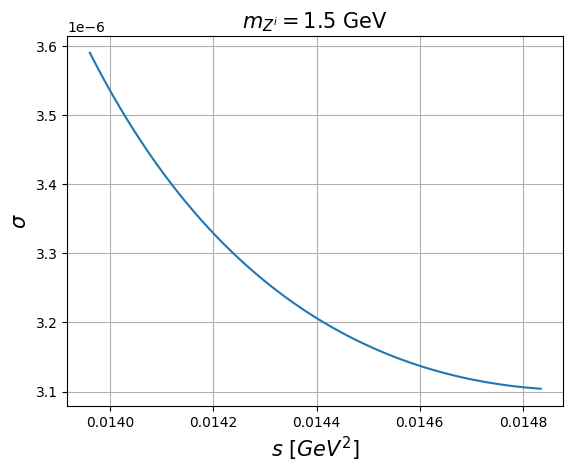

In [53]:
plt.plot(s,sigma(s))
plt.title('$m_{Z^i}=1.5$ GeV', size= 15)
plt.xlabel('$s \ [GeV^2]$',size=15)
plt.ylabel(r'$\sigma$',size=15)
#plt.xlim(0.1,1)
#plt.ylim(0,1E-4)
plt.grid()

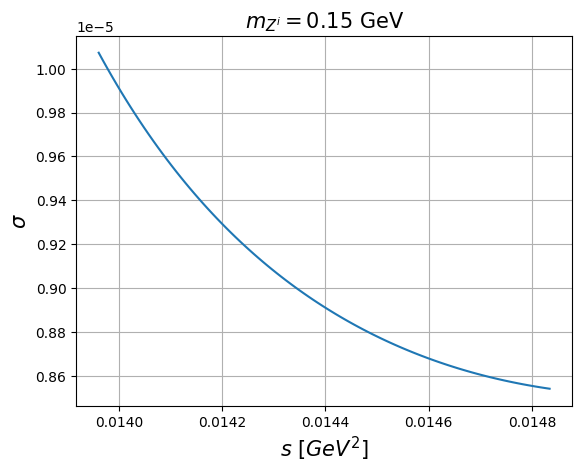

In [54]:
plt.plot(s,sigmaHADRONS(s))
plt.title('$m_{Z^i}=0.15$ GeV', size= 15)
plt.xlabel('$s \ [GeV^2]$',size=15)
plt.ylabel(r'$\sigma$',size=15)
#plt.xlim(0.1,1)
#plt.ylim(0,1E-7)
plt.grid()

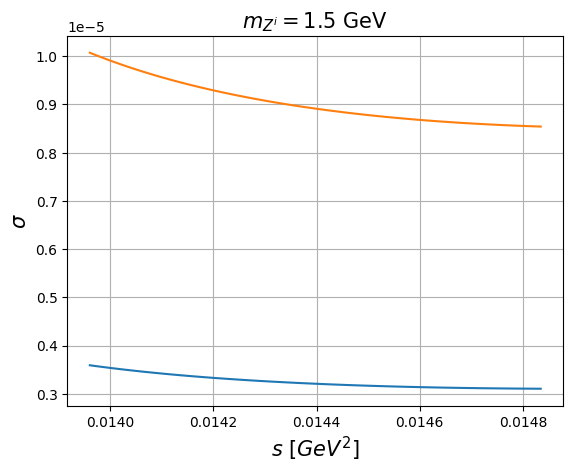

In [56]:
plt.plot(s,sigma(s))
plt.plot(s,sigmaHADRONS(s))
plt.title('$m_{Z^i}=1.5$ GeV', size= 15)
plt.xlabel('$s \ [GeV^2]$',size=15)
plt.ylabel(r'$\sigma$',size=15)
#plt.xlim(0.1,1)
#plt.ylim(0,1E-7)
plt.grid()

$$s-s_0=-2m^2+2E_1E_2-2 \vec{p_1} \cdot \vec{p_2}$$

$$\tilde{s}- 4m^2=2m^2+2E_1E_2-2p_1 \cdot p_2- 4m^2 $$

$$\vec{p_1} \cdot \vec{p_2}=2p_1p_2 \cos \theta_{CM}$$

In [61]:
special.kn(1,np.sqrt(s[0])/T[0])

0.09498244384536267

In [57]:
def pfin_pinit(s):
    return np.sqrt(abs(((s-2*m**2)**2)-4*(m**4))/abs(((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2)))

def p_fin(s):
    return np.sqrt((((s-2*m**2)**2)-4*(m**4))/4*s)

def p_init(s):
    return np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s))

def E1(s):
    return np.sqrt(m1**2 + p_init(s)**2)

def E2(s):
    return np.sqrt(m2**2 + p_init(s)**2)

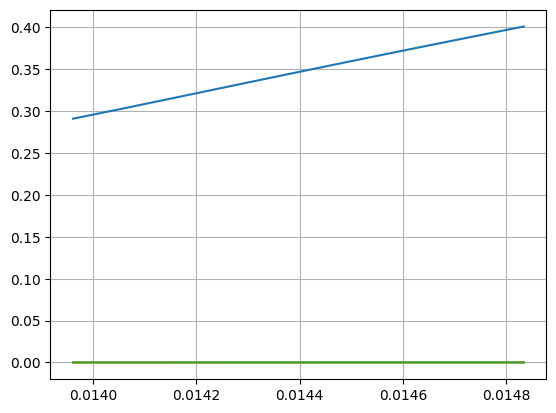

In [58]:
plt.plot(s,pfin_pinit(s-s0))

plt.plot(s,p_fin(s-s0))
plt.plot(s,p_init(s-s0))
#Their value is almost the same

plt.grid()

In [59]:
#def integr(s_tilda):
#    return np.sqrt(s_tilda)* special.kn(1,np.sqrt(s_tilda)/Ttrue)


# container contains the integral value, so it's the numerator of the <sigma*v>

container=[]
for value in range(len(Ttrue)):
    container.append(integrate.quad(lambda s_tilda: ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s_tilda-s0)-mzprime**2)**2))*(pfin_pinit(s_tilda-s0)/(s_tilda-s0))*(((s_tilda-s0)*E1(s_tilda-s0)*E2(s_tilda-s0)/2)+(2*(p_init(s_tilda-s0)**2)*(p_fin(s_tilda-s0)**2)/3)+((m**2)*((s_tilda-s0)-(m1**2)-(m2**2))/2)+((m1*m2)*((s_tilda-s0)-2*(m**2))/2)+((m**2)*m1*m2*2))*           np.sqrt(s_tilda)* special.kv(1,np.sqrt(s_tilda)/T[value]), s0,np.inf)[0])     

    
    #(s_tilda-s0)
    
#NOW IT INTEGRATES THE WHOLE THING, NUT HOW TO INTERPRETATE THE RESULT??
#IT'S TOO LOW??

   
    
    
    
    
    
    
#    ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/((s_tilda-mzprime**2)**2))*(pfin_pinit/s_tilda)*((s_tilda*E1*E2/2)+(2*(p_init**2)*(p_fin**2)/3)+((m**2)*(s_tilda-(m1**2)-(m2**2))/2)+((m1*m2)*(s_tilda-2*(m**2))/2)+((m**2)*m1*m2*2))     
    
    
    
    
    # pfin_pinit= (np.sqrt(((s-2*m**2)**2)-4*(m**4)/((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2)))
    #p_fin=  (np.sqrt((((s-2*m**2)**2)-4*(m**4))/4*s))        # p final
    #p_init= (np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s)))
    #E1= (np.sqrt(m1**2 + (np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s)))**2))
    #E2= (np.sqrt(m2**2 + (np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s)))**2))
    #
    
    #((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/((s_tilda-mzprime**2)**2))*((np.sqrt(((s_tilda-2*m**2)**2)-4*(m**4)/((s_tilda-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2)))/s_tilda)*  ((s_tilda*(np.sqrt(m1**2 + (np.sqrt(abs((((s_tilda-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s_tilda)))**2))*(np.sqrt(m2**2 + (np.sqrt(abs((((s_tilda-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s_tilda)))**2))/2)+(2*((np.sqrt(abs((((s_tilda-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s_tilda)))**2)*((np.sqrt((((s_tilda-2*m**2)**2)-4*(m**4))/4*s_tilda))**2)/3)+((m**2)*(s_tilda-(m1**2)-(m2**2))/2)+((m1*m2)*(s_tilda-2*(m**2))/2)+((m**2)*m1*m2*2))*  
    
    


In [60]:
integrate.quad(lambda s_tilda: ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s_tilda-s0)-mzprime**2)**2))*(pfin_pinit(s_tilda-s0)/(s_tilda-s0))*(((s_tilda-s0)*E1(s_tilda-s0)*E2(s_tilda-s0)/2)+(2*(p_init(s_tilda-s0)**2)*(p_fin(s_tilda-s0)**2)/3)+((m**2)*((s_tilda-s0)-(m1**2)-(m2**2))/2)+((m1*m2)*((s_tilda-s0)-2*(m**2))/2)+((m**2)*m1*m2*2))*np.sqrt(s_tilda)* special.kv(1,np.sqrt(s_tilda)/T[0]), s0,np.inf)[0]



6.973508853980495e-10

In [61]:
container

[6.973508853980495e-10,
 5.963142946339468e-10,
 5.073250415645076e-10,
 4.293339310505139e-10,
 3.613341695916998e-10,
 3.023647344353e-10,
 2.51513358352476e-10,
 2.0791906525949058e-10,
 1.707742016318262e-10,
 1.3932592025347595e-10,
 1.1287708595999279e-10,
 9.078658728846159e-11,
 7.246905288365814e-11,
 5.739398661487053e-11,
 4.5084350085221076e-11,
 3.511463500869197e-11,
 2.710848025208563e-11,
 2.073589870057791e-11,
 1.5710187093695408e-11,
 1.1784597283396885e-11,
 8.748849801130695e-12,
 6.4255701382449276e-12,
 4.666724840570071e-12,
 3.3501286316594372e-12,
 2.3760856773887467e-12,
 1.664218261816838e-12,
 1.1505251120044428e-12,
 7.846999807803872e-13,
 5.277294663633713e-13,
 3.4977797460962264e-13,
 2.2835769931288527e-13,
 1.4677289272069959e-13,
 9.282078498895681e-14,
 5.772641969673482e-14,
 3.528540626103e-14,
 2.1187036903971974e-14,
 1.2490169495840026e-14,
 7.22546563443683e-15,
 4.099687510839345e-15,
 2.2804833981159845e-15,
 1.2431362600288212e-15,
 6.6385

In [62]:
print(len(container))

100


In [63]:
print(len(container))
print(container[0])
print(container[1])
print(container[99])
print(4*m**2)

100
6.973508853980495e-10
5.963142946339468e-10
1.5763191320210648e-65
1.0040040000000002e-06


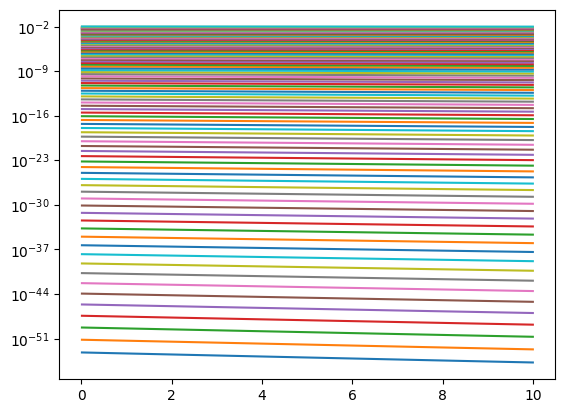

In [64]:
# THOSE AR THE SQRT OF S AND THE BESSEL FUNCTION

linspace=np.linspace(s0,10,100)
for N in range(100):
    plt.plot(linspace, np.sqrt(s)* special.kn(1,np.sqrt(s)/Ttrue[N]))

plt.yscale('log')
#plt.xlim(0, 4*m**2)



# THOSE IN PRINCIPLE SHOULD BE THE PLOT OF THE VARIOUS FUNCTION THAT I HAVE TO INTEGRATE FROM 4*M**2 TO INFINITY

# MAKE SENSE?!?!?!?

# IN MY INTEGRATION s_tilda is a variable in which it integrates into, here is from 0 to 100 GeV, maybe too much?


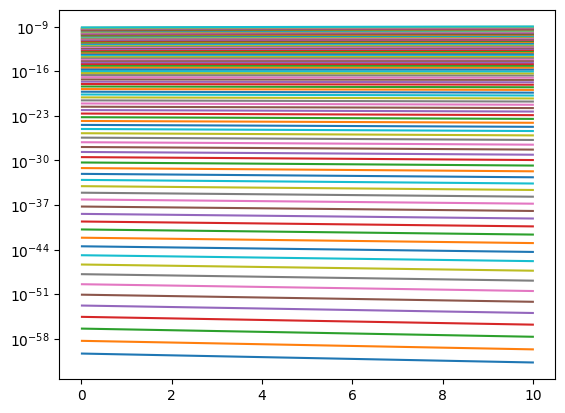

In [65]:
#THOSE ARE THE FUNCTION WE HAVE TO INTEGRATE FROM s0 TO INFINITY

linspace=np.linspace(s0,10,100)
for N in range(100):
    plt.plot(linspace, ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s-s0)-mzprime**2)**2))*(pfin_pinit(s-s0)/(s-s0))*(((s-s0)*E1(s-s0)*E2(s-s0)/2)+(2*(p_init(s-s0)**2)*(p_fin(s-s0)**2)/3)+((m**2)*((s-s0)-(m1**2)-(m2**2))/2)+((m1*m2)*((s-s0)-2*(m**2))/2)+((m**2)*m1*m2*2))*             np.sqrt(s)* special.kn(1,np.sqrt(s)/Ttrue[N]))

plt.yscale('log')

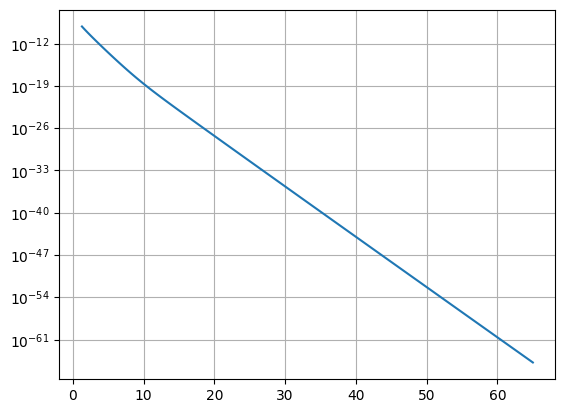

In [66]:

plt.plot(x2,container)
plt.yscale('log')
plt.grid()

# How do I understand which values choose for s_tilda and T??
# They seems not in correlation in each other...
# They are like that just because I chose s_tilda to go from 1 to 100 and T same
# But in principle they can behave differently

# Quello che voglio dire è che s si accoppia con in valori di T a caso
# Il rpimo valore di s è 1, quello di T è 100 e si accoppiano così dando K1(1/100) e così via

# Esiste un legame fra s e la temperatura?!?!?!?!?!?!?!?

In [67]:
def DENOM(x1,x2):
    #T=m/x
    return 1/(8* m1**2 * m2**2  *(m2/x2) *(special.kn(2,x1)*(special.kn(2,x2))))

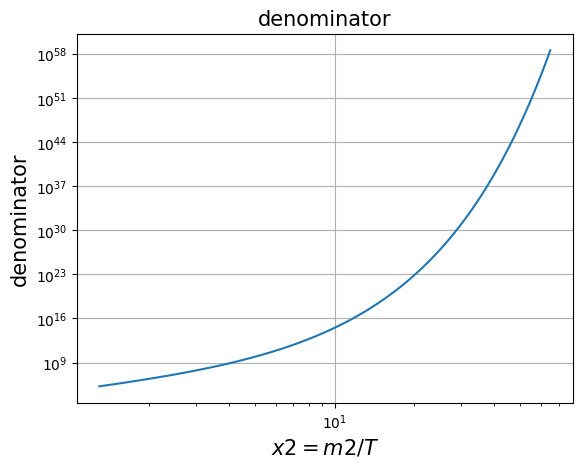

In [68]:
plt.plot(x2,DENOM(x1,x2))
plt.xscale('log')
plt.yscale('log')
#plt.xlim(0.1,100)
plt.xlabel('$x2 = m2/T$', size= 15)
plt.ylabel('denominator', size= 15)
plt.title('denominator', size= 15)
plt.grid()

In [69]:
#HERE IT SHOULD HAVE BEEN IN PRINCIPLE A MULTIPLICATION!!!!!!!!!!!!!!!!!!!!!!

#...... SO BAD...


Total= (container/DENOM(x1,x2))
Total

array([4.07587465e-015, 2.75290123e-015, 1.84522865e-015, 1.22700422e-015,
       8.09129743e-016, 5.28931644e-016, 3.42622667e-016, 2.19829635e-016,
       1.39643500e-016, 8.77853991e-017, 5.45865141e-017, 3.35579777e-017,
       2.03859274e-017, 1.22308640e-017, 7.24325762e-018, 4.23164427e-018,
       2.43736686e-018, 1.38323757e-018, 7.72953810e-019, 4.25007725e-019,
       2.29784537e-019, 1.22069713e-019, 6.36690897e-020, 3.25792564e-020,
       1.63414760e-020, 8.02808862e-021, 3.85944004e-021, 1.81399252e-021,
       8.32800367e-022, 3.73098313e-022, 1.62949598e-022, 6.93090672e-023,
       2.86801825e-023, 1.15336682e-023, 4.50274013e-024, 1.70464423e-024,
       6.25111051e-025, 2.21801521e-025, 7.60632127e-026, 2.51832530e-026,
       8.04099692e-027, 2.47352975e-027, 7.32320213e-028, 2.08474348e-028,
       5.70151046e-029, 1.49678313e-029, 3.76904203e-030, 9.09694797e-031,
       2.10303498e-031, 4.65327998e-032, 9.84607696e-033, 1.99024889e-033,
       3.83816520e-034, 7

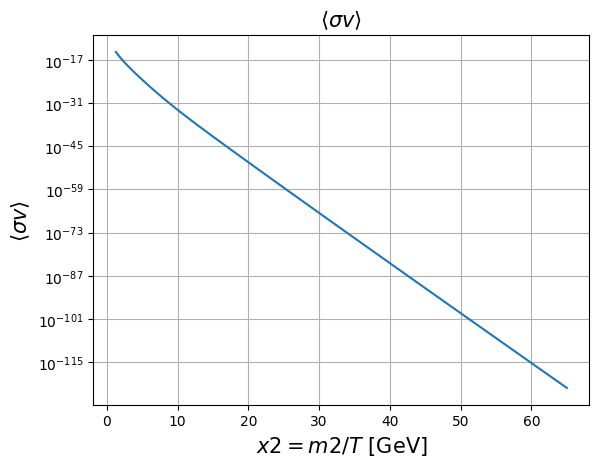

In [70]:
# plot of the total <sigma*v>

plt.plot(x2,Total)


plt.xlabel(r'$x2 = m2/T$ [GeV]', size= 15)
plt.ylabel( r'$\langle \sigma v \rangle$', size= 15)
plt.title( r'$\langle \sigma v \rangle$', size= 15)
plt.yscale('log')
plt.grid() 




$$\sigma v_{full}= (\sigma v)_{e^+e^-} \theta(s-4m_e^2)+ (\sigma v)_{\mu^+ \mu^-} \Big[ \theta(s-4m_{\mu^2}) + \theta (s-4m_{\pi}^2)R(s) \Big]$$

And our range is going from roughly $s_0=0.0135$ GeV up to maximum 1 GeV

And in this range R(s) is kinf of 1 or less


$$x_f= \ln [0.038(n+1)(g/g_*^{1/2}) m_{Pl}m \sigma_0]- \Big( n+ \frac{1}{2} \Big) \ln \{\ln[0.038(n+1)(g/g_*^{1/2}) m_{Pl}m \sigma_0] \}$$

### I have shifted the s0 because 'sigma(s0)' is WAY more different (7 order of magnitude) respect to a value nearby and still into the range (s0, Energy max) .
### Energy max is (E1+E2)^2 considering the max velocity for iDM of 0.1c 
### The shift is of 0.00003........ Can we make a better assumption?
### Actually I don't think that consider s0=(m1+m2)^2 is a great assumption. 
### How could be possible that the two iDM candidate find themself at rest?!?!

In [71]:
# g/g_*^(1/2)

2/np.sqrt(10.75)

0.6099942813304187

In [78]:
sigma0=sigma(s0+0.3)
sigma0

1.5720277332653604e-09

In [79]:
sigma(s0)

78.73215000559006

In [80]:
pfin_pinit(s0+0.03)

1.2034695407871374

In [75]:
s

array([0.01396083, 0.01396965, 0.01397848, 0.0139873 , 0.01399612,
       0.01400494, 0.01401377, 0.01402259, 0.01403141, 0.01404023,
       0.01404906, 0.01405788, 0.0140667 , 0.01407552, 0.01408435,
       0.01409317, 0.01410199, 0.01411081, 0.01411963, 0.01412846,
       0.01413728, 0.0141461 , 0.01415492, 0.01416375, 0.01417257,
       0.01418139, 0.01419021, 0.01419904, 0.01420786, 0.01421668,
       0.0142255 , 0.01423433, 0.01424315, 0.01425197, 0.01426079,
       0.01426961, 0.01427844, 0.01428726, 0.01429608, 0.0143049 ,
       0.01431373, 0.01432255, 0.01433137, 0.01434019, 0.01434902,
       0.01435784, 0.01436666, 0.01437548, 0.01438431, 0.01439313,
       0.01440195, 0.01441077, 0.01441959, 0.01442842, 0.01443724,
       0.01444606, 0.01445488, 0.01446371, 0.01447253, 0.01448135,
       0.01449017, 0.014499  , 0.01450782, 0.01451664, 0.01452546,
       0.01453429, 0.01454311, 0.01455193, 0.01456075, 0.01456957,
       0.0145784 , 0.01458722, 0.01459604, 0.01460486, 0.01461

## I choose 0.01483425 as a middle value for sigma where to take the indicative value for the cross section

In [95]:
number=0.01483425

In [91]:
def sigmazero(s):
    return sigma(s)+ sigmaHADRONS(s)#*(1+1)

In [92]:
# It's fine to define the xf just in function of just sigma0 cohannilation

# If you had an other process that involves different diagrams ypu had to insert all the sigma0
# LOOK (3.12) of the Draft shared with Asli. comes from Kolb Turner

def xf1(s0):
    return np.log(0.038*0.609*Mp*m1*sigmazero(s0))- (0.5)*np.log(np.log(0.038*0.609*Mp*m1*sigmazero(s0)))

In [96]:
xf1(number)         # HERE IT'S CRUCIAL

24.19986294419351

In [74]:
def xf2(s0):
    return np.log(0.038*0.609*Mp*m2*sigmazero(s0))- (0.5)*np.log(np.log(0.038*0.609*Mp*m2*sigmazero(s0)))

In [97]:
xf2(number)

24.457173287631743

In [99]:
# So we can now compute what is the T value of freezeout for both the candidates

Tfo1=m1/xf1(number)
Tfo2=m2/xf2(number)

print(Tfo1)
print(Tfo2)

0.002066127403915606
0.002657706973555738


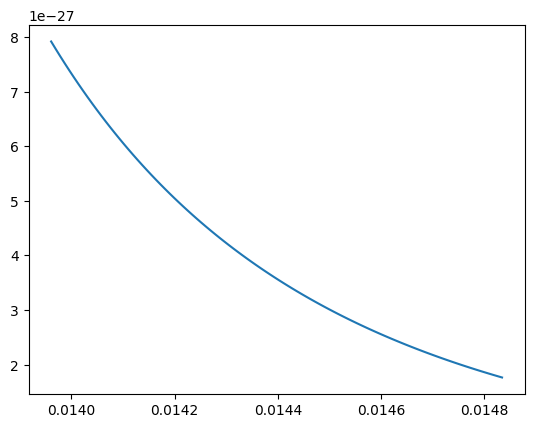

In [101]:

plt.plot(s,  ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s)-mzprime**2)**2))*(pfin_pinit(s)/(s))*(((s)*E1(s)*E2(s)/2)+(2*(p_init(s)**2)*(p_fin(s)**2)/3)+((m**2)*((s)-(m1**2)-(m2**2))/2)+((m1*m2)*((s)-2*(m**2))/2)+((m**2)*m1*m2*2))*np.sqrt(s)* special.kv(1,np.sqrt(s)/Tfo2))




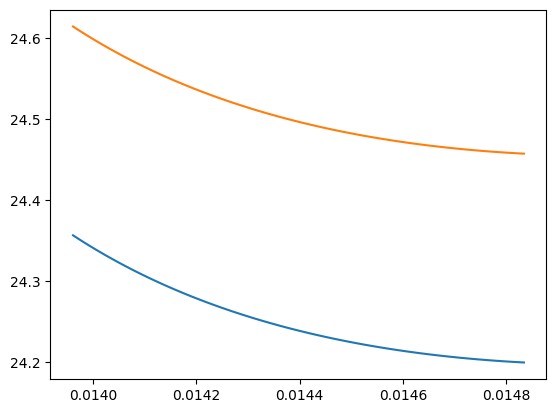

In [102]:
plt.plot(s,xf1(s))
plt.plot(s,xf2(s))



In [118]:
# NOW I CAN CALCULATE PROPERLY THE INTEGRAL AND THE DENOMINATOR FOR A PRECISE T

# I am using Tfo2 in the numerator

NUMERATOR=integrate.quad(lambda s_tilda: ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s_tilda)-mzprime**2)**2))*(pfin_pinit(s_tilda)/(s_tilda))*(((s_tilda)*E1(s_tilda)*E2(s_tilda)/2)+(2*(p_init(s_tilda)**2)*(p_fin(s_tilda)**2)/3)+((m**2)*((s_tilda)-(m1**2)-(m2**2))/2)+((m1*m2)*((s_tilda)-2*(m**2))/2)+((m**2)*m1*m2*2))* (s_tilda-s0)*   np.sqrt(s_tilda)* special.kv(1,np.sqrt(s_tilda)/((Tfo1+Tfo2)/2)), s0, np.inf )[0]    

NUMERATOR
# HERE THE CHOICE OF Tfo1 or Tfo2 change EVERITHING.....
# IF I CHOOSE AN AVERAGE BETWEEN THE TWO VALUES....?!?!?


#  integrate.quad(lambda s_tilda: ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s_tilda-s0)-mzprime**2)**2))*(pfin_pinit(s_tilda-s0)/(s_tilda-s0))*(((s_tilda-s0)*E1(s_tilda-s0)*E2(s_tilda-s0)/2)+(2*(p_init(s_tilda-s0)**2)*(p_fin(s_tilda-s0)**2)/3)+((m**2)*((s_tilda-s0)-(m1**2)-(m2**2))/2)+((m1*m2)*((s_tilda-s0)-2*(m**2))/2)+((m**2)*m1*m2*2))*np.sqrt(s_tilda)* special.kv(1,np.sqrt(s_tilda)/Tfo2), s0, np.inf )[0]

2.7132483964157213e-35

In [119]:

DENOMINATOR= 1/(8* m1**2 * m2**2  *((Tfo1+Tfo2)/2) *(special.kn(2,m1/Tfo1)*(special.kn(2,m2/Tfo2))))

DENOMINATOR

#   1/(8* m1**2 * m2**2  *Tfo1 *(special.kn(2,m1/Tfo1)*(special.kn(2,m2/Tfo2))))

9.03151429080956e+28

In [120]:
SIGMAVTERMAL=NUMERATOR*DENOMINATOR

SIGMAVTERMAL

2.450474166674471e-06

$$1 \text{cm}= 5.068 \times 10^{13} \hbar c \cdot \text{GeV}^{-1}
    \ \ \ \ \ \ \ \ \ 
    1s= 1.519 \times 10^{24} \hbar \cdot \text{GeV}^{-1}
    \ \ \ \ \ \ \ \ \ 
    0.1 \text{pb} \approx 2.6 \times 10^{-10} \hbar c \cdot \text{GeV}^{-2}$$

$$\frac{cm^3}{s}=\frac{(5.068 \times 10^{13} \hbar c \cdot \text{GeV}^{-1})^3}{1.519 \times 10^{24} \hbar \cdot \text{GeV}^{-1}}= 8.569432 \times 10^{16} \text{GeV}^{-2} $$

$$\text{GeV}^{-2}=0.11669385 \times 10^{-16} \frac{cm^3}{s}= 1.1669385 \times 10^{-17} \frac{cm^3}{s}$$

In [121]:
SIGMAVTERMAL*1.1669385*1E-17

2.8595526483478576e-23

$$\langle \sigma v \rangle= 0.0005992953367809461 \ \text{GeV}^{-2}= 6.846779816983444 \times 10^{-22} \frac{cm^3}{s} $$

## MAKE SENSE?!

## I have choose a s range starting from a range of x (14,30) that contains theoretically the freeze-out x-value (20) and the freeze-out temperature. From that I have computed the Temperature range (3.5 MeV ,1.6 MeV), that contains the expected freeze-out temperature value 2.5 MeV.

## From this I have computed the maximum and minimum energy for the range choice done.

## In this range the cross section is almost constant and I have choosen a value for it.

## The centre of mass energy arrives at maximum at 148 MeV, and I do not have considered the presence of hadrons.... I just considered the presence of electrons and muons, but this could be changed, is basically just a factor 2 multiplying the muon cross section "R(s)".

## The freeze-out x now are around 24 and 25, which is good. 

## The choice of the temperatures values in the Bessel functions are crucial. The freeze-out x are almost the same, but the real temperature of freeze-out are VERY different because the difference of masses, and are: 2.6 MeV and 2 MeV for the two spieces.
## So I decided to take an average of the temperature, for the numerator and the denominator



### Before that I have done the same things for a range of x of (1,50) but the relative range of temperatures and so of energies too generates a too big range of values of energies and in the cross section appears a HUGE resonance for the mass of the dark photon squared, that's why I decided to cut the energy range

In [35]:
np.sqrt(np.pi*(Mp**2)/45)

3.223506202052889e+18